## Tensors

High level abstractions for the data.

Deep learning is basically a lot of mathematics.

In [2]:
import torch

In [3]:
# activation function

def sigmoid(x) : 
    return 1 / (1 + torch.exp(-x))


### Matrix Multiplication

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

Here we see that features are Row matrix and the weights are the column matrix. 

In [4]:
# generate some data
torch.manual_seed(7)


features = torch.randn((1,5)) # tensor of shape (1,5)
weights = torch.randn_like(features) # tensor of shape (1,5)
bias = torch.randn((1,1)) # tensor of shape (1,1)

# compute the output : featurs @ weights.T + bias

output = sigmoid(features @ weights.T + bias) 
output

tensor([[0.1595]])

### Functions for reshaping
1. `weights.reshape(a,b)`
2. `weights.view(a,b)`
3. `torch.transpose(weights, 0, 1)`


Matrix multiplication was simple, but the power comes when you _stack_ layers upon layers, because using the universal function of generalization -> This can converge to anything.

#### Some Maths
Inputs : $x_1, x_2, x_3$
Layer1 : $h_1, h_2$
Layer2 : $m_1, m_2$
Output : $y_1$

$h_i = a(\sum_i(w_i*x_i) + b_1)$

$m_i = a(\sum_i(w_i*h_i) + b_2)$

$y_1 = \sum_i(w_i*m_i) + b_3$

Basically like $y_1 = \sum_i(w_i*a(\sum_i(w_i*a(\sum_i(w_i*x_i) + b_1)) + b_2)) + b_3$


In [ ]:
# Generate some data
torch.manual_seed(7)

features = torch.randn((1,3)) # tensor of shape (1,5)
n_input = features.shape[1] # 5
n_hidden_1 = 2
n_hidden_2 = 4
n_hidden_3 = 5
n_output = 1

# Initialize weights and biases
W1 = torch.randn((n_input, n_hidden_1)) # (input, output)
W2 = torch.randn((n_hidden_1, n_hidden_2)) # (input, output)
W3 = torch.randn((n_hidden_2, n_hidden_3)) # (input, output)
W4 = torch.randn((n_hidden_3, n_output)) # (input, output)

B1 = torch.randn((1, n_hidden_1))
B2 = torch.randn((1, n_hidden_2))
B3 = torch.randn((1, n_hidden_3))
B4 = torch.randn((1,n_output))

# Compute the output -> Works Error less
hidden_1 = sigmoid(features @ W1 + B1)
hidden_2 = sigmoid(hidden_1 @ W2 + B2)
hidden_3 = sigmoid(hidden_2 @ W3 + B3)
output = sigmoid(hidden_3 @ W4 + B4)
output 


tensor([[0.3531]])

Cracked it. We need to structure the matrix not row wise like $h_i = \sum_i(w_i * x_i)$ where $x_i$ are the columns, what we should do instead is basically get then column wise because then it becomes easier to structure. 

As in it becomes `(input, output)` to the particular layer, as evident in the previous layers.

#### Torch to Numpy
- `torch.from_numpy(a)` : from numpy
- `b.numpy` : to numpy

As you do this the memory becomes shared, suppose a = b.numpy(), any changes to b will lead changes to a, if you use `mul_`

In [ ]:
import numpy as np

a = np.random.randn(3,4)
b = torch.from_numpy(a)


(tensor([[ 0.1136, -1.6290,  2.3224, -1.1735],
         [-1.8027, -1.4376,  3.1409,  3.8296],
         [-1.2328, -3.1539, -0.1999,  1.2358]], dtype=torch.float64),
 array([[ 0.11362891, -1.62900852,  2.3224199 , -1.17347142],
        [-1.80272793, -1.43758963,  3.14086002,  3.82958067],
        [-1.23280653, -3.1539243 , -0.19990785,  1.23580273]]))

## Neural Networks with Pytorch

Growing the network is going to be cumbersome as you could see 10-12 layers, definetly a lot cumbersome. So we will use `torch.nn` -> which could help us

In [61]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import numpy as np

In [54]:
import torch.utils


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5,))
])

# Download dataset
trainset = datasets.MNIST("~/MNIST_data",download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting /Users/krishuagarwal/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /Users/krishuagarwal/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting /Users/krishuagarwal/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/krishuagarwal/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting /Users/krishuagarwal/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/krishuagarwal/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting /Users/krishuagarwal/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/krishuagarwal/MNIST_data/MNIST/raw



In [75]:
dataiter = iter(trainLoader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


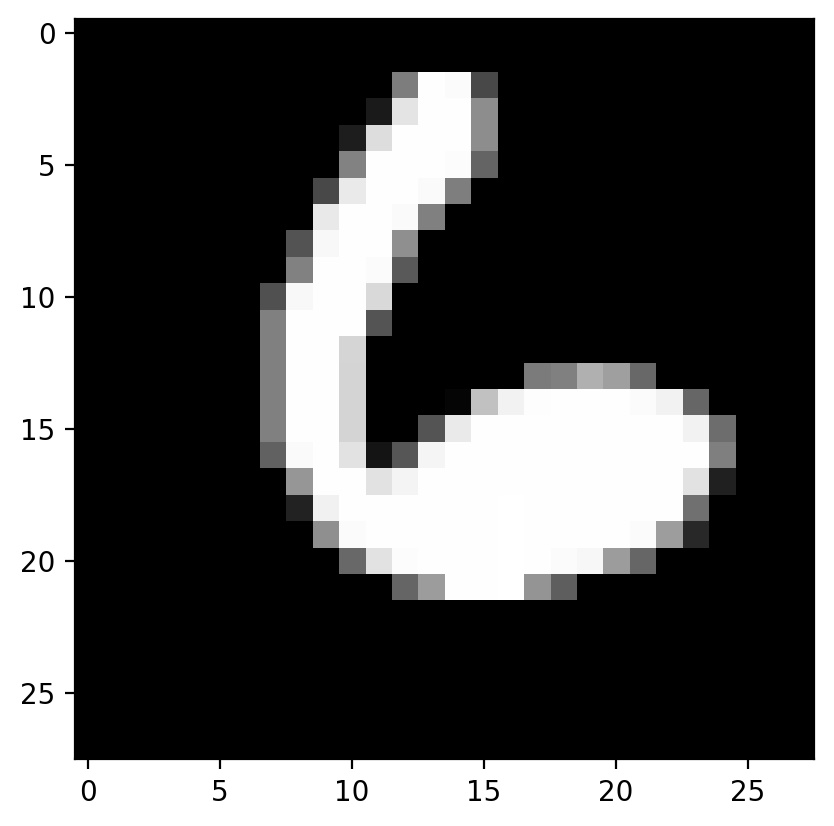

In [86]:
plt.imshow(images[1].numpy().squeeze(), cmap = "Greys_r")
plt.show()

Fully connected networks, takes your every input for their output, so a grid like 28*28 must be translated into 784. Considering the batch as well the input is going to be 64 * 784

In [159]:
# Network

def activation(x) : 
    """Sigmoid Activation"""

    return 1/(1+torch.exp(-x))

def multilayer_net(n_inputs, n_hidden, n_output) : 
    torch.manual_seed(7)

    # weights and biases
    W1 = torch.randn(n_inputs, n_hidden) # 784 * 256
    W2 = torch.randn(n_hidden, n_output) # 256 * 10
    B1 = torch.randn((1, n_hidden)) # 1 * 256
    B2 = torch.randn((1, n_output)) # 1 * 10

    return W1, W2, B1, B2

def output(features, w1, w2, b1, b2) : 
    h = activation(features @ w1 + b1) # (64, 784) * (784 * 256)
    return activation(h @ w2 + b2) # (64 * 256) * (256 * 10)

# Working
features = torch.flatten(images, start_dim = 1) # Flattens 3 Dimensions
w1, w2, b1, b2 = multilayer_net(features.shape[1], 256, 10 )

out = output(features, w1, w2, b1, b2)
nums_out = torch.arange(0,10)

# Futile efforts of plotting
# figure, ax = plt.subplots(1, 2, figsize = (4, 8))
# ax[0].imshow(images[1, :, :, :].numpy().squeeze(), cmap = "Greys_r")
# digit_labels = range(10)  # 0-9 digits
# ax[1].bar(out[1, :], digit_labels)
# plt.show()

Random intialization doesn't guarantee that our networks will predict well, they need to be trained right. We will not calculate the probability for each of the numbers occuring using softmax

$\sigma_(x_i) = \frac{\exp_(x_i)}{\sum_k{\exp_(x_k)}}$

In [ ]:
from torch import nn
from torch.nn.functional import sigmoid, softmax # Robust implementation

def softmax(x) : 
    x_exp = torch.exp(x)
    return x_exp / torch.sum(x_exp, dim = 1, keepdim=True)
    
class Network(nn.Module) : 
    def __init__(self, num_input, num_output, num_hidden) : 
        super().__init__()
        self.hidden = nn.Linear(num_input, num_hidden) # Linear Transformation
        self.output = nn.Linear(num_hidden, num_output) # Linear Transformation
       # self.sigmoid = nn.Sigmoid() # Sigmoid Function
       # self.softmax = nn.Softmax(dim = 1) # Softmax

    def forward(self, x) : # Must have a forward method defined.
        """Forward Pass"""

        x = self.hidden(x)
        # x = self.sigmoid(x)
        x = sigmoid(x)
        x = self.output(x)
        # return self.softmax(x)
        return softmax(x)


net = Network(784, 10, 256)
out = net.forward(features)
net

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

You can get the weights and bias via : 
- `nn.Linear(input, output)` has attributes weight and bias
  - `fc1 = nn.Linear(input, output)`, we can access `fc1.weight` & `fc1.bias`


Good for our person initialization -> Xavier initialization